In [1]:
import tensorflow.lite as tflite

In [3]:
interpreter = tflite.Interpreter(model_path="../data/model_dir/model.tflite")

In [4]:
interpreter.allocate_tensors()

In [5]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.uint8,
  'quantization': (0.003921568859368563, 0),
  'quantization_parameters': {'scales': array([0.00392157], dtype=float32),
   'zero_points': array([0]),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [6]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'Identity',
  'index': 168,
  'shape': array([1, 5]),
  'shape_signature': array([-1,  5]),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0]),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [7]:
import os
img_path = os.path.join("d:/", "oneNeuron/Source/tflite_testing/daisy.jpeg")

In [8]:
import cv2
import numpy as np
import imghdr

In [17]:
os.path.isfile(img_path)

True

In [18]:
import sys
img_type = imghdr.what(img_path)
if img_type not in ["jpeg", "png", "jpg"]:
    print("quiting the program")
    sys.exit()
else:
    print(f"yes the file is of type: {img_type}. proceeding further")

yes the file is of type: jpeg. proceeding further


In [22]:
batch_size, pixel_ht, pexel_wd, ch = input_details[0]['shape']

In [23]:
img = cv2.imread(img_path)
img = cv2.resize(img, (pixel_ht, pexel_wd))

In [24]:
img.shape

(224, 224, 3)

In [27]:
input_img = np.expand_dims(img, 0)

In [28]:
input_img.shape

(1, 224, 224, 3)

In [32]:
input_index = input_details[0]['index']
input_index

0

In [33]:
interpreter.set_tensor(input_index, input_img)
interpreter.invoke()

In [35]:
output_index = output_details[0]['index']
output = interpreter.get_tensor(output_index)
pred =  np.squeeze(output)
pred

array([237,   3,   2,   5,   8], dtype=uint8)

In [36]:
label_map = {
    0: "daisy", 
    1: "dandelion", 
    2: "roses", 
    3: "sunflowers", 
    4: "tulips"
}

In [37]:
argmax = np.argmax(pred)
argmax 

0

In [38]:
label_map[argmax]

'daisy'

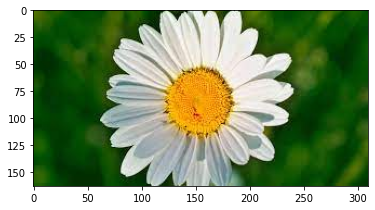

In [42]:
import matplotlib.pyplot as plt
img = plt.imread(img_path)
plt.imshow(img)